<a href="https://colab.research.google.com/github/febbyftrp/Python-Task/blob/main/FinalTask_FebbyFitri(1101183474).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINAL TASK**

---
Febby Fitri Permadani (1101183474)


# Power Receiver Function

In [496]:
import numpy as np
import matplotlib.pyplot as plt

In [497]:
#Parameter

frek  = 1800 #MHz
loc1  = 'urban'
loc2  = 'suburban'
loc3  = 'open'
tower = 80 #m
user  = 1.5 #m
dmin  = 300 #m
dmax  = 1000 #m
N     = 200 #titik
d     = np.random.randint(dmin,dmax,N)
Gtx   = 10 #dB
Grx   = 2 #dB
Bw    = 5000000 #hz

In [498]:
#FUNGSI PATHLOSS(COST231)

def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [499]:
LpUrban   = cos(frek,loc1,tower,user,d)
LpSuburban= cos(frek,loc2,tower,user,d)
LpOpen    = cos(frek,loc3,tower,user,d)

In [500]:
#Numeric to Logaritmic (watt to dB)
NtL = lambda x:10*np.log10(x)

In [501]:
#Calculate transmitter power in dBm
#Ptx = 30 Watt = 30000 mW

Ptx=NtL(30000)
print("Ptx is",Ptx,"dBm")

Ptx is 44.771212547196626 dBm


In [502]:
#Logaritmic to Numeric (dBm to mW)
LtN = lambda x: 10**(x/10)

In [503]:
#FUNGSI DAYA TERIMA

def Prx(Ptx,Lp,Gtx,Grx):
  #Ptx  = daya transmitter (dBm)
  #Lp   = path loss (dB)
  #Gtx  = gain antenna transmitter (dB)
  #Grx  = gain antenna receiver (dB)
  
  #calculate prx in dBm
  pdbm = Ptx-Lp+Gtx+Grx

  #convert prx from dBm to mW
  prx=LtN(pdbm)

  return prx

In [504]:
#At Different Location (Urban, Suburban, Open)

prxUrban    = Prx(Ptx,LpUrban,Gtx,Grx)
prxSuburban = Prx(Ptx,LpSuburban,Gtx,Grx)
prxOpen     = Prx(Ptx,LpOpen,Gtx,Grx)

In [505]:
print(prxUrban, "mW")

[4.87762062e-14 3.12381932e-14 2.99857151e-13 1.12458885e-12
 2.17574961e-13 4.28988974e-14 1.78928634e-13 8.32694934e-14
 5.07371104e-13 8.10397714e-14 3.72468314e-14 2.52789596e-13
 1.06414889e-13 7.71507771e-14 9.43596877e-14 4.40298768e-14
 5.85255721e-14 8.56714904e-13 1.21803081e-13 5.33606564e-14
 3.27529273e-14 1.88512070e-13 5.58821312e-13 3.49029418e-13
 1.38016111e-13 6.57336447e-14 9.89557814e-14 1.33710227e-13
 1.00391536e-13 1.28238329e-13 1.10147975e-13 5.72740501e-13
 1.22083519e-12 6.80045287e-14 1.12458885e-12 3.28647661e-14
 7.38245997e-14 2.89427830e-14 1.98778288e-13 7.74940942e-14
 3.69839875e-14 3.44141916e-13 4.67654093e-14 1.65249796e-13
 4.44591001e-13 4.28988974e-14 9.94313636e-14 1.75876180e-13
 1.73878977e-13 7.09897058e-14 2.82882036e-14 3.72468314e-14
 1.29578419e-13 1.01363875e-13 2.78652786e-13 1.44043980e-13
 6.40952145e-14 3.24203845e-14 2.89966171e-13 4.84023097e-14
 7.38245997e-14 4.78484647e-14 1.31623114e-13 3.19838314e-14
 6.17363226e-14 9.303549

In [506]:
print(prxSuburban,"mW")

[1.10907835e-13 7.10297223e-14 6.81818248e-13 2.55710160e-12
 4.94724166e-13 9.75439506e-14 4.06849753e-13 1.89339024e-13
 1.15366559e-12 1.84269059e-13 8.46922252e-14 5.74795563e-13
 2.41967261e-13 1.75426224e-13 2.14556021e-13 1.00115583e-13
 1.33076043e-13 1.94800709e-12 2.76957089e-13 1.21332005e-13
 7.44739403e-14 4.28640668e-13 1.27065360e-12 7.93626651e-13
 3.13822442e-13 1.49465832e-13 2.25006665e-13 3.04031677e-13
 2.28271298e-13 2.91589622e-13 2.50455590e-13 1.30230319e-12
 2.77594751e-12 1.54629391e-13 2.55710160e-12 7.47282405e-14
 1.67863128e-13 6.58103952e-14 4.51984100e-13 1.76206862e-13
 8.40945681e-14 7.82513399e-13 1.06335665e-13 3.75746671e-13
 1.01091555e-12 9.75439506e-14 2.26088049e-13 3.99909052e-13
 3.95367791e-13 1.61417117e-13 6.43220059e-14 8.46922252e-14
 2.94636730e-13 2.30482213e-13 6.33603547e-13 3.27528672e-13
 1.45740353e-13 7.37178009e-14 6.59328037e-13 1.10057666e-13
 1.67863128e-13 1.08798327e-13 2.99285978e-13 7.27251621e-14
 1.40376680e-13 2.115450

In [507]:
print(prxOpen, "mW")

[1.01181768e-13 6.48007676e-14 6.22026167e-13 2.33285646e-12
 4.51339308e-13 8.89898295e-14 3.71171046e-13 1.72734929e-13
 1.05249484e-12 1.68109576e-13 7.72651367e-14 5.24388841e-13
 2.20747931e-13 1.60042214e-13 1.95740521e-13 9.13359425e-14
 1.21405933e-13 1.77717652e-12 2.52669325e-13 1.10691789e-13
 6.79429448e-14 3.91051005e-13 1.15922358e-12 7.24029526e-13
 2.86301769e-13 1.36358419e-13 2.05274696e-13 2.77369606e-13
 2.08253037e-13 2.66018657e-13 2.28491876e-13 1.18809766e-12
 2.53251067e-12 1.41069160e-13 2.33285646e-12 6.81749441e-14
 1.53142363e-13 6.00391497e-14 4.12347334e-13 1.60754393e-13
 7.67198912e-14 7.13890852e-13 9.70105538e-14 3.42795550e-13
 9.22263269e-13 8.89898295e-14 2.06261247e-13 3.64839010e-13
 3.60695995e-13 1.47261636e-13 5.86812848e-14 7.72651367e-14
 2.68798549e-13 2.10270065e-13 5.78039656e-13 2.98806030e-13
 1.32959646e-13 6.72531151e-14 6.01508236e-13 1.00406154e-13
 1.53142363e-13 9.92572530e-14 2.73040081e-13 6.63475258e-14
 1.28066341e-13 1.929936

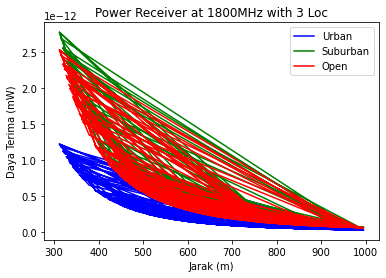

In [508]:
plt.figure()
plt.plot(d,prxUrban,'b', label='Urban')
plt.plot(d,prxSuburban,'g', label='Suburban')
plt.plot(d,prxOpen,'r', label='Open')
plt.legend()
plt.title('Power Receiver at 1800MHz with 3 Loc')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

In [509]:
d_sort=d[np.argsort(d)]
prxUrban_sort    =prxUrban[np.argsort(d)]
prxSuburban_sort =prxSuburban[np.argsort(d)]
prxOpen_sort     =prxOpen[np.argsort(d)]

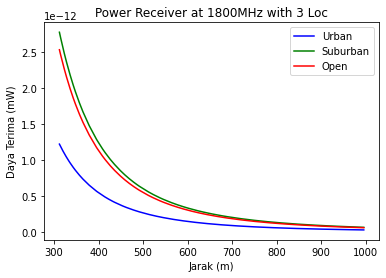

In [510]:
plt.figure()
plt.plot(d_sort,prxUrban_sort,'b', label='Urban')
plt.plot(d_sort,prxSuburban_sort,'g', label='Suburban')
plt.plot(d_sort,prxOpen_sort,'r', label='Open')
plt.legend()
plt.title('Power Receiver at 1800MHz with 3 Loc')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

In [511]:
#Parameter

frek1 = 700 #MHz
frek2 = 900 #MHz
frek3 = 1800 #MHz
loc   = 'urban'

In [512]:
LpUrbanF1 = cos(frek1,loc,tower,user,d)
LpUrbanF2 = cos(frek2,loc,tower,user,d)
LpUrbanF3 = cos(frek3,loc,tower,user,d)

In [513]:
#At Different Frequency (700 MHz, 900 MHz, 1800 MHz)

prxUrbanF1 = Prx(Ptx,LpUrbanF1,Gtx,Grx)
prxUrbanF2 = Prx(Ptx,LpUrbanF2,Gtx,Grx)
prxUrbanF3 = Prx(Ptx,LpUrbanF3,Gtx,Grx)

In [514]:
print(prxUrbanF1, "mW")

[8.95599346e-13 5.73576904e-13 5.50579655e-12 2.06490237e-11
 3.99498050e-12 7.87683739e-13 3.28537990e-12 1.52894433e-12
 9.31604289e-12 1.48800351e-12 6.83903903e-13 4.64157044e-12
 1.95392616e-12 1.41659614e-12 1.73257580e-12 8.08450101e-13
 1.07461133e-12 1.57304835e-11 2.23647488e-12 9.79776262e-13
 6.01389541e-13 3.46134519e-12 1.02607406e-11 6.40866813e-12
 2.53416878e-12 1.20696163e-12 1.81696651e-12 2.45510672e-12
 1.84332897e-12 2.35463503e-12 2.02247084e-12 1.05163164e-11
 2.24162411e-11 1.24865823e-12 2.06490237e-11 6.03443058e-13
 1.35552287e-12 5.31429964e-13 3.64984731e-12 1.42289992e-12
 6.79077722e-13 6.31892676e-12 8.58678302e-13 3.03421730e-12
 8.16331241e-12 7.87683739e-13 1.82569886e-12 3.22933258e-12
 3.19266114e-12 1.30347026e-12 5.19410971e-13 6.83903903e-13
 2.37924094e-12 1.86118247e-12 5.11645477e-12 2.64484888e-12
 1.17687776e-12 5.95283589e-13 5.32418433e-12 8.88734083e-13
 1.35552287e-12 8.78564714e-13 2.41678440e-12 5.87267865e-13
 1.13356520e-12 1.708261

In [515]:
print(prxUrbanF2, "mW")

[4.65129769e-13 2.97887324e-13 2.85943697e-12 1.07240762e-11
 2.07479423e-12 4.09083768e-13 1.70626296e-12 7.94057661e-13
 4.83828946e-12 7.72795038e-13 3.55185682e-13 2.41060090e-12
 1.01477209e-12 7.35709599e-13 8.99813724e-13 4.19868785e-13
 5.58099695e-13 8.16963098e-12 1.16151385e-12 5.08847074e-13
 3.12331825e-13 1.79765058e-12 5.32891850e-12 3.32834357e-12
 1.31612126e-12 6.26835856e-13 9.43642060e-13 1.27506035e-12
 9.57333411e-13 1.22288036e-12 1.05037079e-12 5.46165185e-12
 1.16418810e-11 6.48490999e-13 1.07240762e-11 3.13398320e-13
 7.03991181e-13 2.75998299e-13 1.89554921e-12 7.38983470e-13
 3.52679204e-13 3.28173637e-12 4.45954815e-13 1.57582160e-12
 4.23961857e-12 4.09083768e-13 9.48177211e-13 1.67715477e-12
 1.65810945e-12 6.76957640e-13 2.69756232e-13 3.55185682e-13
 1.23565945e-12 9.66605635e-13 2.65723220e-12 1.37360300e-12
 6.11211790e-13 3.09160697e-13 2.76511661e-12 4.61564293e-13
 7.03991181e-13 4.56282828e-13 1.25515765e-12 3.04997729e-13
 5.88717403e-13 8.871862

In [516]:
print(prxUrbanF3, "mW")

[4.87762062e-14 3.12381932e-14 2.99857151e-13 1.12458885e-12
 2.17574961e-13 4.28988974e-14 1.78928634e-13 8.32694934e-14
 5.07371104e-13 8.10397714e-14 3.72468314e-14 2.52789596e-13
 1.06414889e-13 7.71507771e-14 9.43596877e-14 4.40298768e-14
 5.85255721e-14 8.56714904e-13 1.21803081e-13 5.33606564e-14
 3.27529273e-14 1.88512070e-13 5.58821312e-13 3.49029418e-13
 1.38016111e-13 6.57336447e-14 9.89557814e-14 1.33710227e-13
 1.00391536e-13 1.28238329e-13 1.10147975e-13 5.72740501e-13
 1.22083519e-12 6.80045287e-14 1.12458885e-12 3.28647661e-14
 7.38245997e-14 2.89427830e-14 1.98778288e-13 7.74940942e-14
 3.69839875e-14 3.44141916e-13 4.67654093e-14 1.65249796e-13
 4.44591001e-13 4.28988974e-14 9.94313636e-14 1.75876180e-13
 1.73878977e-13 7.09897058e-14 2.82882036e-14 3.72468314e-14
 1.29578419e-13 1.01363875e-13 2.78652786e-13 1.44043980e-13
 6.40952145e-14 3.24203845e-14 2.89966171e-13 4.84023097e-14
 7.38245997e-14 4.78484647e-14 1.31623114e-13 3.19838314e-14
 6.17363226e-14 9.303549

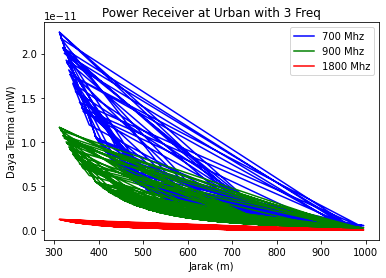

In [517]:
plt.figure()
plt.plot(d,prxUrbanF1,'b',label='700 Mhz')
plt.plot(d,prxUrbanF2,'g',label='900 Mhz')
plt.plot(d,prxUrbanF3,'r',label='1800 Mhz')
plt.legend()
plt.title('Power Receiver at Urban with 3 Freq')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

In [518]:
d_sort=d[np.argsort(d)]
UrbanF1_sort=prxUrbanF1[np.argsort(d)]
UrbanF2_sort=prxUrbanF2[np.argsort(d)]
UrbanF3_sort=prxUrbanF3[np.argsort(d)]

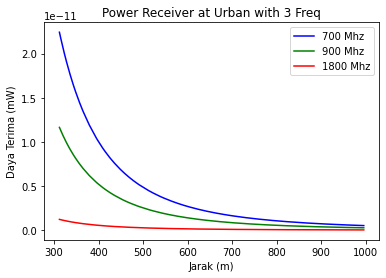

In [519]:
plt.figure()
plt.plot(d_sort,UrbanF1_sort,'b',label='700 Mhz')
plt.plot(d_sort,UrbanF2_sort,'g',label='900 Mhz')
plt.plot(d_sort,UrbanF3_sort,'r',label='1800 Mhz')
plt.legend()
plt.title('Power Receiver at Urban with 3 Freq')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

# SNR Function 

In [520]:
#FUNGSI SNR

def snr(prx, Bw):
  no  = -174 + 10*np.log10(Bw)
  Noise = LtN(no)
  SNR = prx/Noise
  return SNR

In [521]:
#At Different Location (Urban, Suburban, Open)

SNRUrban    = prxUrban/Noise
SNRSuburban = prxSuburban/Noise
SNROpen     = prxOpen/Noise

In [522]:
print(SNRUrban, "mW")

[0.00245041 0.00156934 0.01506414 0.05649679 0.01093047 0.00215514
 0.00898897 0.00418327 0.02548917 0.00407125 0.0018712  0.01269958
 0.00534604 0.00387588 0.00474042 0.00221196 0.00294019 0.04303941
 0.00611911 0.00268072 0.00164543 0.00947042 0.02807391 0.01753445
 0.00693362 0.00330231 0.00497131 0.0067173  0.00504344 0.0064424
 0.00553358 0.02877318 0.06133199 0.00341639 0.05649679 0.00165105
 0.00370878 0.00145402 0.00998617 0.00389313 0.00185799 0.01728891
 0.00234939 0.00830177 0.02233524 0.00215514 0.00499521 0.00883562
 0.00873528 0.00356636 0.00142114 0.0018712  0.00650973 0.00509229
 0.01399888 0.00723644 0.00322    0.00162873 0.01456724 0.00243162
 0.00370878 0.0024038  0.00661245 0.0016068  0.00310149 0.00467389
 0.02450416 0.02853759 0.02925206 0.02853759 0.00353569 0.00180638
 0.00621382 0.00214718 0.00147326 0.00276744 0.03687077 0.00196009
 0.01466489 0.00190475 0.0024038  0.00561659 0.00231401 0.01635056
 0.00197425 0.00292824 0.00531993 0.00213926 0.00780935 0.01778

In [523]:
print(SNRSuburban, "mW")

[0.00557176 0.00356837 0.034253   0.12846298 0.02485382 0.00490039
 0.02043921 0.00951196 0.05795754 0.00925726 0.00425475 0.02887642
 0.01215589 0.00881302 0.01077881 0.00502958 0.00668544 0.09786345
 0.0139137  0.00609544 0.0037414  0.02153393 0.06383475 0.03987
 0.01576573 0.00750882 0.01130382 0.01527386 0.01146783 0.0146488
 0.01258232 0.06542475 0.1394573  0.00776823 0.12846298 0.00375418
 0.00843306 0.00330616 0.02270665 0.00885223 0.00422472 0.0393117
 0.00534206 0.01887666 0.0507861  0.00490039 0.01135815 0.02009052
 0.01986238 0.00810923 0.00323139 0.00425475 0.01480188 0.0115789
 0.0318308  0.0164543  0.00732166 0.00370341 0.03312314 0.00552905
 0.00843306 0.00546578 0.01503545 0.00365355 0.00705221 0.01062754
 0.05571781 0.06488905 0.06651364 0.06488905 0.00803949 0.00410736
 0.01412906 0.00488229 0.00334991 0.00629263 0.08383713 0.00445687
 0.03334517 0.00433104 0.00546578 0.01277107 0.00526161 0.03717807
 0.00448908 0.00665827 0.01209652 0.00486427 0.01775699 0.04043872
 

In [524]:
print(SNROpen, "mW")

[0.00508314 0.00325544 0.03124918 0.11719741 0.02267426 0.00447065
 0.01864679 0.00867781 0.05287495 0.00844544 0.00388162 0.0263441
 0.01108987 0.00804016 0.00983356 0.00458851 0.00609916 0.08928131
 0.01269353 0.0055609  0.0034133  0.01964551 0.05823676 0.0363736
 0.01438315 0.00685034 0.01031253 0.01393442 0.01046216 0.01336417
 0.01147891 0.05968733 0.12722758 0.00708699 0.11719741 0.00342495
 0.00769352 0.00301623 0.02071539 0.00807594 0.00385423 0.03586425
 0.00487359 0.01722127 0.04633241 0.00447065 0.0103621  0.01832868
 0.01812055 0.00739809 0.00294801 0.00388162 0.01350383 0.01056349
 0.0290394  0.01501134 0.00667959 0.00337864 0.03021841 0.00504418
 0.00769352 0.00498646 0.01371691 0.00333315 0.00643376 0.00969556
 0.05083163 0.05919861 0.06068072 0.05919861 0.00733446 0.00374716
 0.01289001 0.00445413 0.00305614 0.0057408  0.07648503 0.00406603
 0.03042096 0.00395123 0.00498646 0.01165111 0.0048002  0.03391773
 0.00409541 0.00607437 0.01103571 0.0044377  0.01619979 0.036892

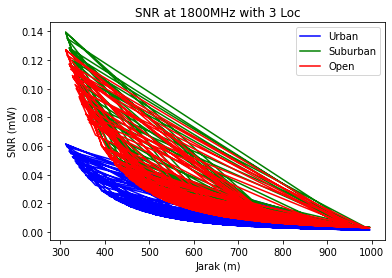

In [525]:
plt.figure()
plt.plot(d,SNRUrban,'b', label='Urban')
plt.plot(d,SNRSuburban,'g', label='Suburban')
plt.plot(d,SNROpen,'r', label='Open')
plt.legend()
plt.title('SNR at 1800MHz with 3 Loc')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (mW)')
plt.show()

In [526]:
d_sort=d[np.argsort(d)]
SNRUrban_sort     = SNRUrban[np.argsort(d)]
SNRSuburban_sort  = SNRSuburban[np.argsort(d)]
SNROpen_sort      = SNROpen[np.argsort(d)]

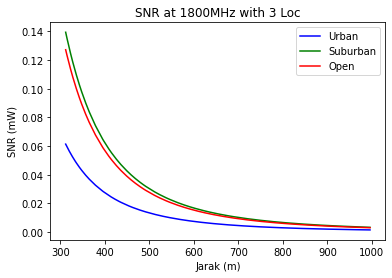

In [527]:
plt.figure()
plt.plot(d_sort,SNRUrban_sort,'b',label='Urban')
plt.plot(d_sort,SNRSuburban_sort,'g',label='Suburban')
plt.plot(d_sort,SNROpen_sort,'r',label='Open')
plt.legend()
plt.title('SNR at 1800MHz with 3 Loc')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (mW)')
plt.show()

In [528]:
#At Different Frequency (700 MHz, 900 MHz, 1800 MHz)

SNRUrbanF1 = prxUrbanF1/Noise
SNRUrbanF2 = prxUrbanF2/Noise
SNRUrbanF3 = prxUrbanF3/Noise

In [529]:
print(SNRUrbanF1, "mW")

[0.04499288 0.0288152  0.27659871 1.03736005 0.20069875 0.03957144
 0.16505002 0.07681069 0.46801683 0.07475392 0.03435778 0.23318196
 0.09816081 0.07116657 0.08704067 0.0406147  0.05398603 0.79026376
 0.11235542 0.04922173 0.03021244 0.17389012 0.5154763  0.32195693
 0.12731088 0.06063501 0.09128027 0.12333898 0.09260466 0.11829152
 0.10160434 0.52831585 1.12614104 0.06272975 1.03736005 0.03031561
 0.06809839 0.02669783 0.18336004 0.07148326 0.03411532 0.31744853
 0.04313805 0.15243219 0.41010627 0.03957144 0.09171896 0.16223433
 0.16039204 0.06548339 0.02609403 0.03435778 0.11952766 0.09350158
 0.25703907 0.1328712  0.05912367 0.0299057  0.26747493 0.04464798
 0.06809839 0.0441371  0.12141376 0.029503   0.05694774 0.08581919
 0.44993061 0.52398998 0.53710875 0.52398998 0.06492019 0.03316758
 0.1140945  0.03942528 0.02705109 0.05081407 0.67699886 0.03599
 0.26926783 0.03497386 0.0441371  0.10312852 0.0424884  0.30021911
 0.03625005 0.05376664 0.09768141 0.03927982 0.14339066 0.3265494

In [530]:
print(SNRUrbanF2, "mW")

[0.02336706 0.01496518 0.14365162 0.53875323 0.10423295 0.02055144
 0.08571878 0.03989165 0.24306467 0.03882347 0.01784372 0.12110311
 0.05097985 0.03696038 0.0452046  0.02109325 0.02803766 0.4104237
 0.05835182 0.02556332 0.01569084 0.09030988 0.26771276 0.16720842
 0.06611894 0.03149081 0.04740643 0.06405614 0.04809426 0.06143473
 0.05276824 0.27438098 0.58486166 0.03257871 0.53875323 0.01574442
 0.03536692 0.01386553 0.09522809 0.03712485 0.0177178  0.16486698
 0.02240376 0.0791657  0.21298881 0.02055144 0.04763427 0.08425645
 0.08329965 0.03400881 0.01355194 0.01784372 0.06207672 0.04856007
 0.13349331 0.06900669 0.03070589 0.01553153 0.13891318 0.02318794
 0.03536692 0.02292261 0.06305627 0.01532239 0.02957583 0.04457022
 0.23367159 0.27213434 0.27894758 0.27213434 0.03371632 0.01722559
 0.05925501 0.02047553 0.01404899 0.0263903  0.35159954 0.01869142
 0.13984432 0.01816368 0.02292261 0.05355983 0.02206636 0.15591888
 0.01882648 0.02792372 0.05073087 0.02039999 0.07446998 0.16959

In [531]:
print(SNRUrbanF3, "mW")

[0.00245041 0.00156934 0.01506414 0.05649679 0.01093047 0.00215514
 0.00898897 0.00418327 0.02548917 0.00407125 0.0018712  0.01269958
 0.00534604 0.00387588 0.00474042 0.00221196 0.00294019 0.04303941
 0.00611911 0.00268072 0.00164543 0.00947042 0.02807391 0.01753445
 0.00693362 0.00330231 0.00497131 0.0067173  0.00504344 0.0064424
 0.00553358 0.02877318 0.06133199 0.00341639 0.05649679 0.00165105
 0.00370878 0.00145402 0.00998617 0.00389313 0.00185799 0.01728891
 0.00234939 0.00830177 0.02233524 0.00215514 0.00499521 0.00883562
 0.00873528 0.00356636 0.00142114 0.0018712  0.00650973 0.00509229
 0.01399888 0.00723644 0.00322    0.00162873 0.01456724 0.00243162
 0.00370878 0.0024038  0.00661245 0.0016068  0.00310149 0.00467389
 0.02450416 0.02853759 0.02925206 0.02853759 0.00353569 0.00180638
 0.00621382 0.00214718 0.00147326 0.00276744 0.03687077 0.00196009
 0.01466489 0.00190475 0.0024038  0.00561659 0.00231401 0.01635056
 0.00197425 0.00292824 0.00531993 0.00213926 0.00780935 0.01778

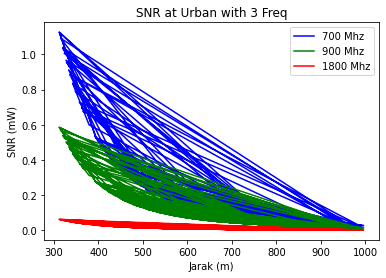

In [532]:
plt.figure()
plt.plot(d,SNRUrbanF1,'b', label='700 Mhz')
plt.plot(d,SNRUrbanF2,'g', label='900 Mhz')
plt.plot(d,SNRUrbanF3,'r', label='1800 Mhz')
plt.legend()
plt.title('SNR at Urban with 3 Freq')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (mW)')
plt.show()

In [533]:
d_sort=d[np.argsort(d)]
SNRUrbanF1_sort = SNRUrbanF1[np.argsort(d)]
SNRUrbanF2_sort = SNRUrbanF2[np.argsort(d)]
SNRUrbanF3_sort = SNRUrbanF3[np.argsort(d)]

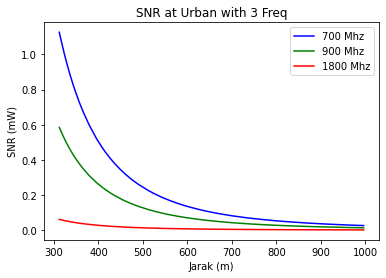

In [534]:
plt.figure()
plt.plot(d_sort,SNRUrbanF1_sort,'b',label='700 Mhz')
plt.plot(d_sort,SNRUrbanF2_sort,'g',label='900 Mhz')
plt.plot(d_sort,SNRUrbanF3_sort,'r',label='1800 Mhz')
plt.legend()
plt.title('SNR at Urban with 3 Freq')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (mW)')
plt.show()

# Cell Capacity Function

In [535]:
#FUNGSI KAPASITAS SELULER

def CellCap(SNR,Bw):
  Cap = Bw*np.log2(1+SNR)
  return Cap

In [536]:
#At Diferent Location (Urban,Suburban,Open)

CapUrban    = Bw*np.log2(1+SNRUrban)
CapSuburban = Bw*np.log2(1+SNRSuburban)
CapOpen     = Bw*np.log2(1+SNROpen)

In [537]:
print(CapUrban, "bps")

[ 17654.32026506  11311.49194505 107854.47283497 396441.91552608
  78418.88645783  15529.34382618  64552.00372816  30112.97442722
 181561.29234838  29308.26979265  13485.21463522  91031.25701497
  38460.82853533  27904.52044847  34114.08231471  15938.30488128
  21177.88242466 303968.35287412  44005.54882712  19311.42141887
  11859.53344332  67993.17090109 199719.9545951  125388.16433638
  49842.87010218  23781.87815851  35771.60558814  48293.04472003
  36289.31432124  46323.05377154  39806.33713948 204624.70002107
 429380.02479291  24602.06534032 396441.91552608  11899.99585774
  26703.70552408  10480.91700762  71677.687491    28028.45321516
  13390.14029019 123647.30063761  16927.37494126  59637.43659076
 159341.79722035  15529.34382618  35943.09660911  63455.6005665
  62738.14015179  25680.0956991   10244.04541763  13485.21463522
  46805.56206436  36639.90222799 100280.31581453  52011.93326789
  23190.05972012  11739.22065734 104322.42402407  17519.15435998
  26703.70552408  17318.93

In [538]:
print(CapSuburban, "bps")

[ 40080.18111507  25694.54567037 242945.71251597 871795.42881366
 177090.71682191  35262.48713011 145951.18308611  68290.03187478
 406408.63087393  66469.81643379  30626.39009802 205348.56569912
  87157.5076632   63293.96797226  77336.60458525  36189.8132761
  48064.75361857 673493.13967167  99674.27263995  43835.87235383
  26938.14583394 153685.64321798 446370.34646696 282015.90324346
 112838.50700749  53962.37068533  81082.44026487 109344.6688655
  82252.18766543 104902.27369374  90195.99822141 457143.53247588
 941734.29471101  55819.40072247 871795.42881366  27029.95723941
  60576.6198462   23809.60005139 161961.9633253   63574.38539136
  30410.72037459 278141.95995943  38432.27103834 134897.07903448
 357345.11588271  35262.48713011  81469.93080999 143485.91033074
 141872.44060184  58259.82151899  23271.98208674  30626.39009802
 105990.4867647   83044.27051637 226032.10386242 117726.73926689
  52622.23682151  26665.1457583  235061.13166226  39773.78987079
  60576.6198462   39319.915

In [539]:
print(CapOpen, "bps")

[ 36574.24266138  23444.9189547  221964.87329439 799420.66892619
 161733.48254308  32177.02800652 133269.4615218   62327.12888558
 371670.48803175  60665.18228132  27945.80293378 187572.53527702
  79556.21250855  57765.56309686  70587.63738116  33023.39893774
  43862.50079777 616882.9226795   90988.21837715  40002.32193552
  24579.82397616 140338.39008381 408312.18966012 257720.84556274
 103013.43448527  49246.25316778  74008.25773074  99821.71106751
  75076.4786712   95763.64612225  82331.21578953 418193.22345233
 863894.10194538  50941.55788144 799420.66892619  24663.61141131
  55284.65292067  21724.75699251 147903.27487971  58021.58587111
  27748.97350342 254174.78514424  35070.13025571 123167.66916151
 326706.28818095  32177.02800652  74362.11495353 131016.45662172
 129541.94768642  53169.50471581  21234.1452808   27945.80293378
  96757.69332364  75799.82242332 206491.1026     107479.20203741
  48022.85270604  24330.68362733 214751.11432754  36294.58504091
  55284.65292067  35880.3

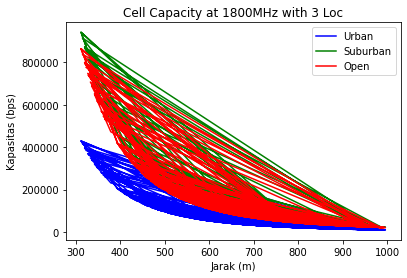

In [540]:
plt.figure()
plt.plot(d,CapUrban,'b', label='Urban')
plt.plot(d,CapSuburban,'g', label='Suburban')
plt.plot(d,CapOpen,'r', label='Open')
plt.legend()
plt.title('Cell Capacity at 1800MHz with 3 Loc')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

In [541]:
d_sort=d[np.argsort(d)]
CapUrban_sort    = CapUrban[np.argsort(d)]
CapSuburban_sort = CapSuburban[np.argsort(d)]
CapOpen_sort     = CapOpen[np.argsort(d)]

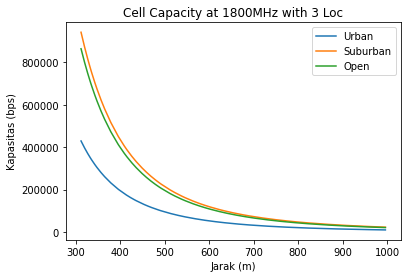

In [542]:
plt.figure()
plt.plot(d_sort,CapUrban_sort,label='Urban')
plt.plot(d_sort,CapSuburban_sort,label='Suburban')
plt.plot(d_sort,CapOpen_sort,label='Open')
plt.legend()
plt.title('Cell Capacity at 1800MHz with 3 Loc')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

In [543]:
#At Different Frequency (700 MHz, 900 MHz, 1800 MHz)

CapUrbanF1 = Bw*np.log2(1+SNRUrbanF1)
CapUrbanF2 = Bw*np.log2(1+SNRUrbanF2)
CapUrbanF3 = Bw*np.log2(1+SNRUrbanF3)

In [544]:
print(CapUrbanF1, "bps")

[ 317465.54166713  204919.31950546 1761525.49263427 5133504.80154027
 1319371.13069201  279944.53575261 1101959.5073883   533823.18863963
 2769342.56173848  520031.8397161   243676.46149983 1511928.42753687
  675446.67329894  495914.22422506  602029.60785754  287179.94010279
  379278.74282209 4200860.78449871  768089.14749699  346597.9876941
  214709.36244183 1156486.86946325 2998856.47203204 2013375.87139785
  864427.14440884  424641.38276771  630108.36181721  838966.74490466
  638857.40958591  806481.59222337  698030.74989926 3059713.64779958
 5441186.49765814  438873.86857861 5133504.80154027  215431.67346194
  475222.7509972   190058.23503403 1214445.40997119  498046.55434893
  241985.40452303 1988732.98687894  304650.47427721 1023409.29149509
 2479019.48260654  279944.53575261  633007.58988938 1084504.89539908
 1073061.54393399  457540.48069402  185814.70090726  243676.46149983
  814450.87121028  644776.52523035 1650147.43173323  899919.23074633
  414355.25569437  212561.20653075 

In [545]:
print(CapUrbanF2, "bps")

[ 166618.53161688  107151.18974154  968238.21128554 3108809.42209048
  715222.77991646  146744.50526189  593252.31445419  282166.10629087
 1569506.78737134  274752.55260494  127580.34668307  824594.88275286
  358675.01262364  261803.85926995  318926.87974493  150573.15099385
  199465.58526918 2480643.13154949  409096.44145562  182082.85337321
  112306.68901986  623691.14268067 1711139.48366147 1115310.98592323
  461842.01482023  223654.83591842  334106.85865001  447871.32324518
  338842.32834596  430078.30801006  370939.37686083 1748983.22047622
 3321784.5737676   231258.82197185 3108809.42209048  112687.19383225
  250710.63482268   99331.57809142  656156.74939842  262947.89453203
  126687.89594796 1100826.09744456  159825.21391204  549581.9848923
 1392831.19034158  146744.50526189  335675.78972012  583530.10223599
  577161.81637682  241242.41833039   97100.11457052  127580.34668307
  434439.94734736  342047.57610461  903879.38315099  481354.44126096
  218163.61982799  111175.17270674 

In [546]:
print(CapUrbanF3, "bps")

[ 17654.32026506  11311.49194505 107854.47283497 396441.91552608
  78418.88645783  15529.34382618  64552.00372816  30112.97442722
 181561.29234838  29308.26979265  13485.21463522  91031.25701497
  38460.82853533  27904.52044847  34114.08231471  15938.30488128
  21177.88242466 303968.35287412  44005.54882712  19311.42141887
  11859.53344332  67993.17090109 199719.9545951  125388.16433638
  49842.87010218  23781.87815851  35771.60558814  48293.04472003
  36289.31432124  46323.05377154  39806.33713948 204624.70002107
 429380.02479291  24602.06534032 396441.91552608  11899.99585774
  26703.70552408  10480.91700762  71677.687491    28028.45321516
  13390.14029019 123647.30063761  16927.37494126  59637.43659076
 159341.79722035  15529.34382618  35943.09660911  63455.6005665
  62738.14015179  25680.0956991   10244.04541763  13485.21463522
  46805.56206436  36639.90222799 100280.31581453  52011.93326789
  23190.05972012  11739.22065734 104322.42402407  17519.15435998
  26703.70552408  17318.93

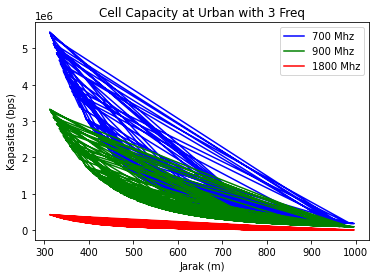

In [547]:
plt.figure()
plt.plot(d,CapUrbanF1,'b', label='700 Mhz')
plt.plot(d,CapUrbanF2,'g', label='900 Mhz')
plt.plot(d,CapUrbanF3,'r', label='1800 Mhz')
plt.legend()
plt.title('Cell Capacity at Urban with 3 Freq')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

In [548]:
d_sort=d[np.argsort(d)]
CapUrbanF1_sort = CapUrbanF1[np.argsort(d)]
CapUrbanF2_sort = CapUrbanF2[np.argsort(d)]
CapUrbanF3_sort = CapUrbanF3[np.argsort(d)]

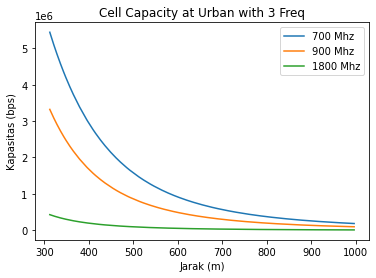

In [549]:
plt.figure()
plt.plot(d_sort,CapUrbanF1_sort,label='700 Mhz')
plt.plot(d_sort,CapUrbanF2_sort,label='900 Mhz')
plt.plot(d_sort,CapUrbanF3_sort,label='1800 Mhz')
plt.legend()
plt.title('Cell Capacity at Urban with 3 Freq')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()